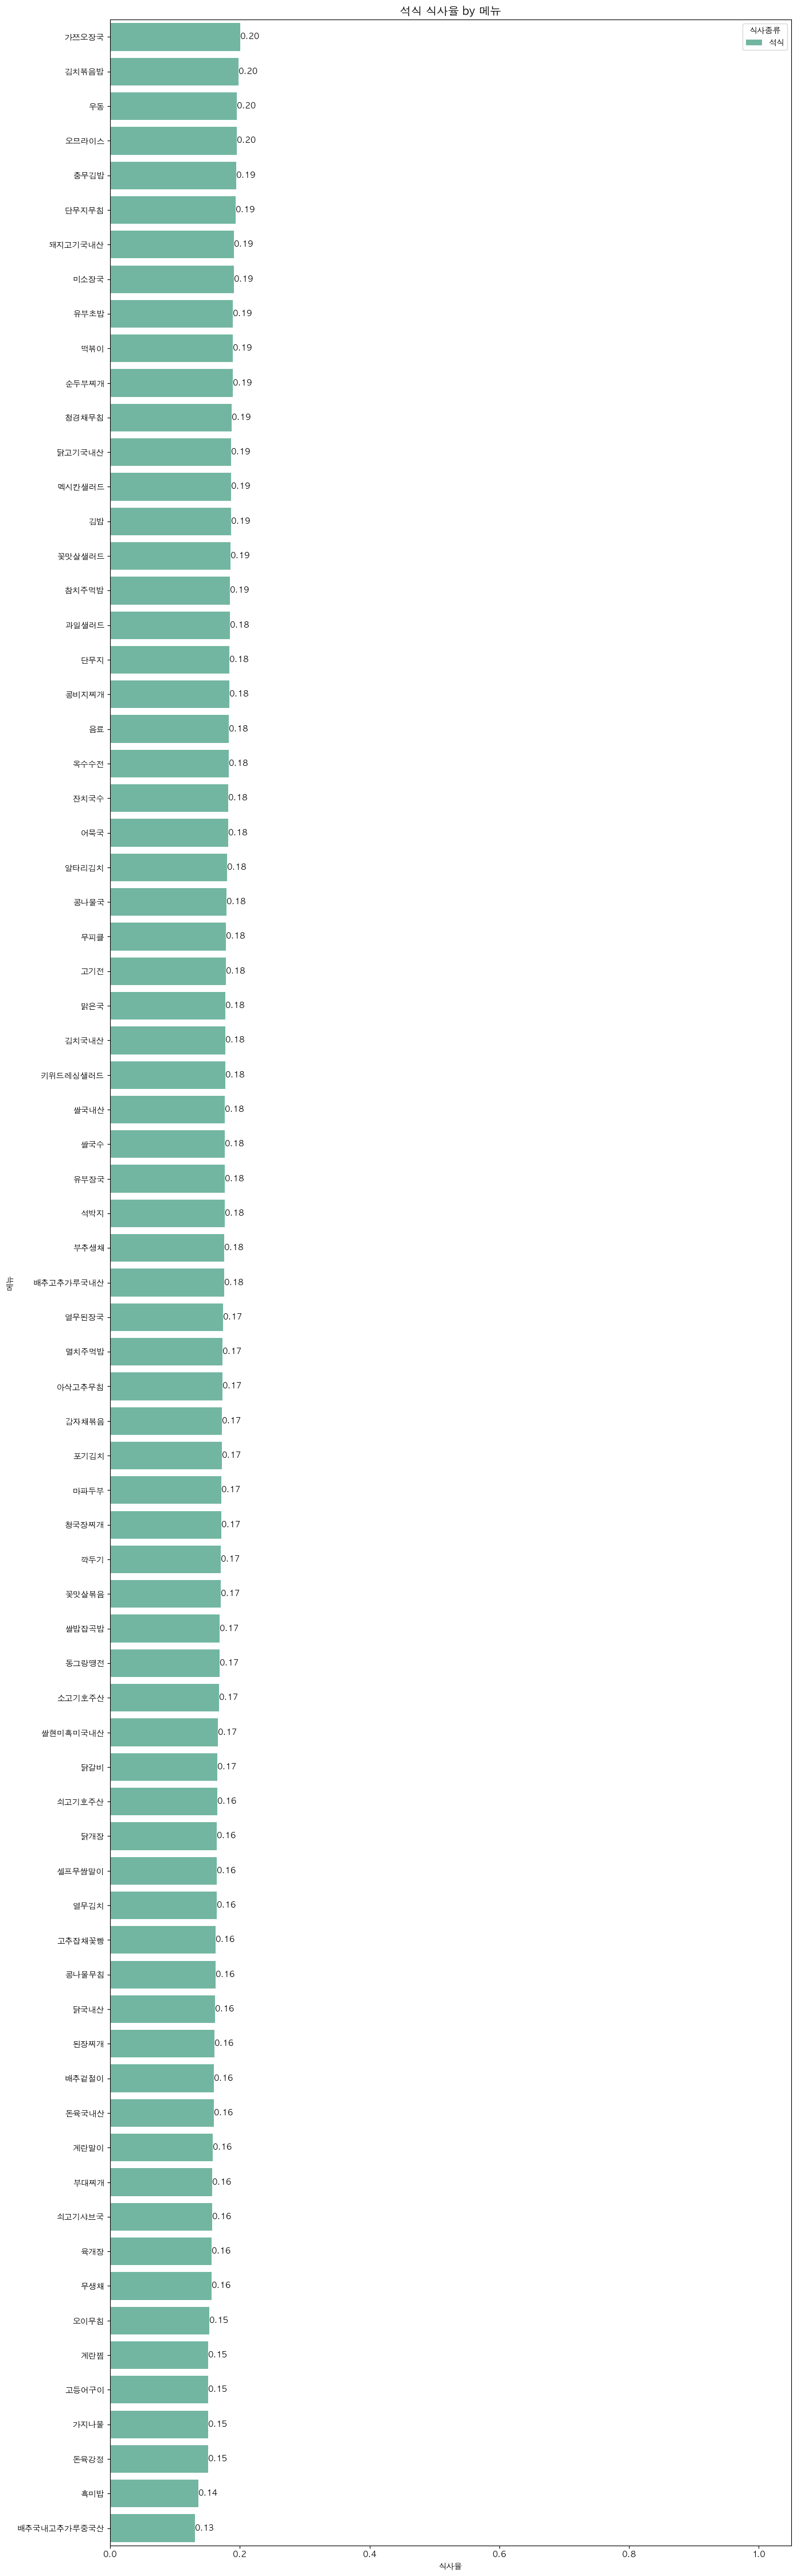

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
import re
from collections import defaultdict
from itertools import combinations
from collections import Counter
import ast

# ✅ Mac 한글 폰트 설정
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

# 1. CSV 불러오기
df = pd.read_csv("../data/train.csv")

# 2. 식사율 계산
df["중식_식사율"] = df["중식계"] / df["본사정원수"]
df["석식_식사율"] = df["석식계"] / df["본사정원수"]

# 3. 메뉴 분리 함수
def split_menus(menu_string):
    if pd.isna(menu_string):
        return []
    menu_string = re.sub(r"[^\uAC00-\uD7A3a-zA-Z0-9\s]", "", menu_string)
    return list(set(menu_string.strip().split()))

df["중식_메뉴리스트"] = df["중식메뉴"].apply(split_menus)
df["석식_메뉴리스트"] = df["석식메뉴"].apply(split_menus)


# 4. 메뉴별 식사율 수집
lunch_ratios = defaultdict(list)
dinner_ratios = defaultdict(list)

for _, row in df.iterrows():
    for menu in row["중식_메뉴리스트"]:
        lunch_ratios[menu].append(row["중식_식사율"])
    for menu in row["석식_메뉴리스트"]:
        dinner_ratios[menu].append(row["석식_식사율"])

# 5. 평균 식사율 계산 (5회 이상 등장한 메뉴만)
lunch_avg = {m: sum(v)/len(v) for m, v in lunch_ratios.items() if len(v) >= 15}
dinner_avg = {m: sum(v)/len(v) for m, v in dinner_ratios.items() if len(v) >= 15}

# 6. 상위 10개씩 추출
lunch = sorted(lunch_avg.items(), key=lambda x: x[1], reverse=True)
dinner = sorted(dinner_avg.items(), key=lambda x: x[1], reverse=True)

# 7. 시각화용 데이터 프레임 구성
plot_df_l = pd.DataFrame(lunch, columns=["메뉴", "식사율"])
plot_df_d = pd.DataFrame(dinner, columns=["메뉴", "식사율"])
plot_df_l["식사종류"] = ["중식"] * len(lunch)
plot_df_d["식사종류"] = ["석식"] * len(dinner)

# 8. 시각화
plt.figure(figsize=(14, 45))
ax = sns.barplot(data=plot_df_d, x="식사율", y="메뉴", hue="식사종류", dodge=True, palette="Set2")

# Bar에 식사율 표시
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', fontsize=10)

plt.title("석식 식사율 by 메뉴", fontsize=14)
plt.xlabel("식사율")
plt.ylabel("메뉴")
plt.xlim(0, 1.05)
plt.legend(title="식사종류")
plt.tight_layout()
plt.show()

{('닭고기국내산', '요구르트'): 3, ('쫄면야채무침', '카레덮밥'): 3, ('시래기국', '훈제오리구이'): 3, ('쌈무양파절임', '훈제오리구이'): 4, ('꽃게탕', '돈육굴소스볶음'): 3, ('동태러시아산', '탕수어'): 3, ('깍두기', '부대찌개'): 5, ('닭갈비', '콩나물국'): 3, ('콩나물국', '톳두부무침'): 3, ('골뱅이무침소면', '소불고기'): 4, ('깍두기', '파래김양념장'): 3, ('쌈무부추생채', '훈제오리구이'): 7, ('닭갈비', '취나물'): 3, ('배추된장국', '콩나물무침'): 4, ('메추리알조림', '콩나물무침'): 3, ('훈제오리구이', '훈제오리국내산'): 3, ('무쌈양파절임', '훈제오리구이'): 6, ('닭고기국내산', '닭데리야끼조림'): 3, ('등갈비김치찜', '열무김치'): 7, ('나물비빔밥', '미소장국'): 5, ('깍두기', '돈육김치찌개'): 4, ('쇠고기샤브국', '오징어볶음'): 6, ('버섯불고기', '콩나물국'): 5, ('단호박영양밥', '돈육칠리강정'): 3, ('된장찌개', '배추겉절이'): 5, ('산채비빔밥', '요플레'): 3, ('미소장국', '요플레'): 3, ('미소장국', '산채비빔밥'): 4, ('골뱅이무침소면', '숙주나물'): 4, ('미니채소떡갈비', '숙주나물'): 3, ('갈치구이', '무생채'): 3, ('갈치구이', '비엔나감자볶음'): 4, ('닭고기국내산', '차돌박이찌개'): 3, ('가지나물', '홍어채무침'): 3, ('돈육굴소스볶음', '홍어채무침'): 3, ('깍두기', '참치김치찌개'): 4, ('모둠쌈', '제육볶음'): 3, ('어묵볶음', '열무김치'): 3, ('맑은국', '카레덮밥'): 11, ('쫄면무침', '카레덮밥'): 4, ('배추된장국', '훈제오리구이'): 3, ('고등어구이', '육개장'): 3, ('계란말이', '콩나물국'): 4, ('배추된장국', '알타리김치'): 3, ('동

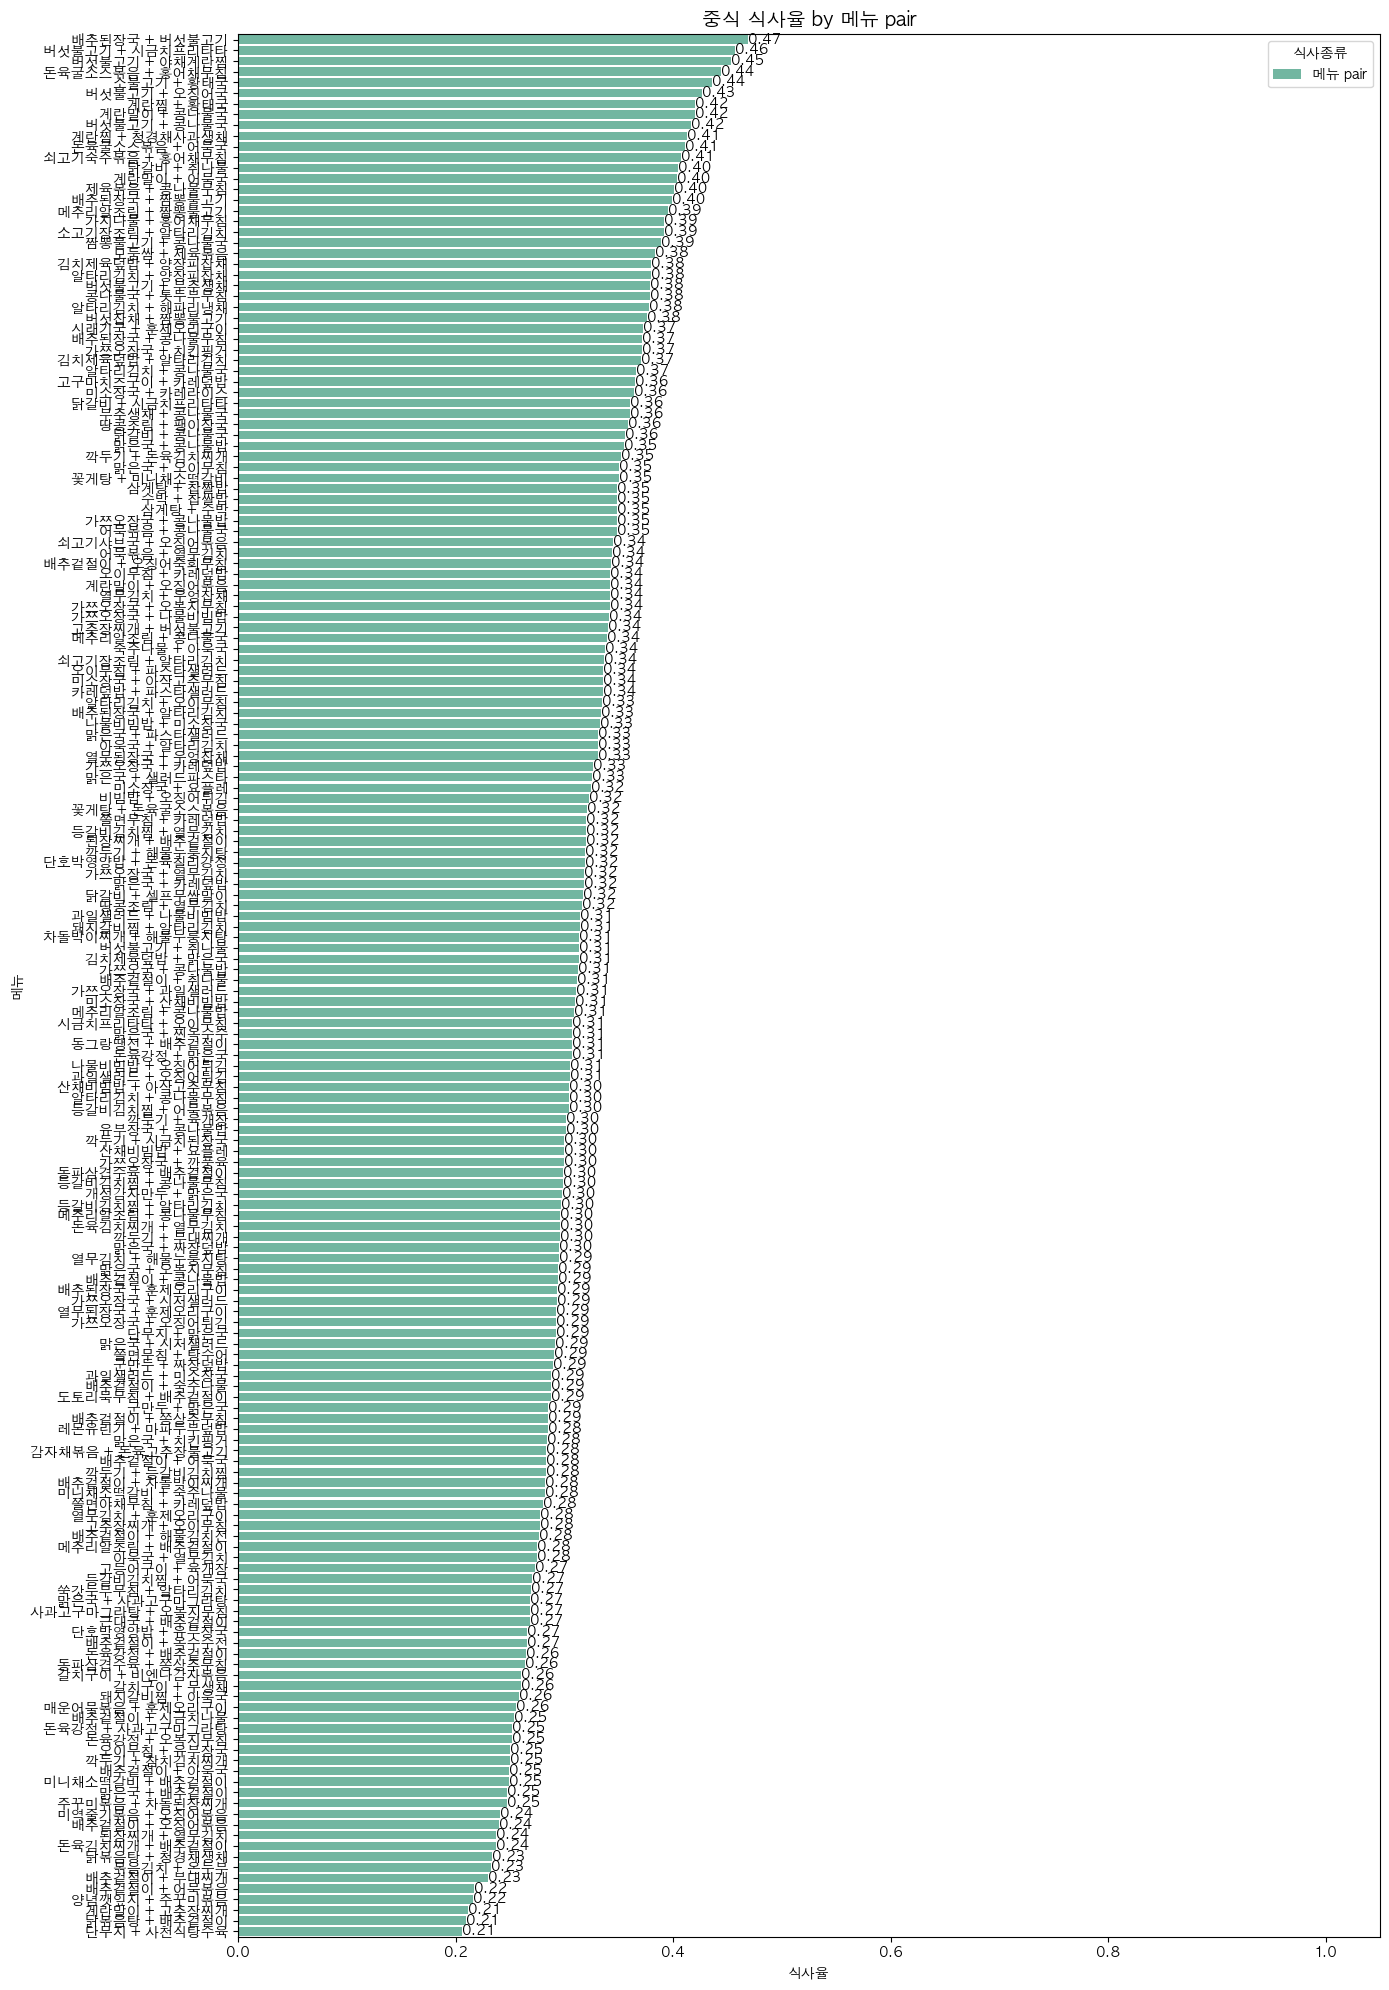

In [ ]:
# 예시 DataFrame, 실제로는 이미 DataFrame이 있다고 가정
# df = pd.read_csv(...) 또는 df = your_dataframe
# 문자열로 되어있는 리스트를 진짜 리스트로 변환
#menu_lists = df['중식_메뉴리스트'].apply(ast.literal_eval)

# 조합 추출 및 정렬
pair_counts = Counter()

for menu_list in df['중식_메뉴리스트']:
    removed = ['김치국내산', '쌀국내산', '배추고추가루국내산', '쌀밥잡곡밥', '쌀현미흑미국내산', '쇠고기호주산', '쌀밥흑미밥찰현미밥', '포기김치', '돈육국내산']
    for i in removed:
        if i in menu_list:
            menu_list.remove(i)
    # 2개씩 조합 생성
    pairs = combinations(menu_list, 2)
    # 정렬해서 중복 제거 효과 (예: ('김치', '밥') == ('밥', '김치'))
    sorted_pairs = [tuple(sorted(pair)) for pair in pairs]
    pair_counts.update(sorted_pairs)

# 3번 이상 등장한 조합 필터링
frequent_pairs = {pair: count for pair, count in pair_counts.items() if count >= 3}

print(frequent_pairs)

# 4. 메뉴별 식사율 수집
pair_ratios = defaultdict(list)

for _, row in df.iterrows():
    for pair in frequent_pairs:
        if pair[0] in row['중식메뉴'] and pair[1] in row['중식메뉴']:
            pair_ratios[pair].append(row["중식_식사율"])

# 5. 평균 식사율 계산 (5회 이상 등장한 메뉴만)
pair_avg = {m: sum(v)/len(v) for m, v in pair_ratios.items()}

print(pair_avg)


# 6. 상위 10개씩 추출
pairs = sorted(pair_avg.items(), key=lambda x: x[1], reverse=True)

# 7. 시각화용 데이터 프레임 구성
plot_df_pair = pd.DataFrame(pairs, columns=["메뉴 pair", "식사율"])
plot_df_pair["식사종류"] = ["메뉴 pair"] * len(pairs)
plot_df_pair["메뉴 pair"] = plot_df_pair["메뉴 pair"].apply(lambda x: " + ".join(x))


# 8. 시각화
plt.figure(figsize=(14, 20))
ax = sns.barplot(data=plot_df_pair, x="식사율", y="메뉴 pair", hue="식사종류", dodge=True, palette="Set2")

# Bar에 식사율 표시
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', fontsize=10)

plt.title("중식 식사율 by 메뉴 pair", fontsize=14)
plt.xlabel("식사율")
plt.ylabel("메뉴")
plt.xlim(0, 1.05)
plt.legend(title="식사종류")
plt.tight_layout()
plt.show()

{('과일샐러드', '락교', '참치회덮밥'): 3, ('김치전', '석박지', '설렁탕'): 3, ('군만두', '떡볶이', '유부초밥'): 3, ('석박지', '오징어무침', '충무김밥'): 7, ('오징어무침', '잔치국수', '충무김밥'): 3, ('가쯔오장국', '떡볶이', '오므라이스'): 3, ('락교', '미소장국', '참치회덮밥'): 5, ('멸치주먹밥', '무피클', '잔치국수'): 5, ('맑은국', '볶음밥짜장소스', '사천식탕수육'): 3, ('단무지', '맑은국', '볶음밥짜장소스'): 4, ('락교', '모둠과일', '미소장국'): 3, ('수제피클', '시리얼과일샐러드', '토마토스파게티'): 3, ('가쯔오장국', '닭갈비볶음밥', '크림카레우동'): 3, ('김밥', '떡볶이', '잔치국수'): 3, ('꽃맛살샐러드', '석박지', '오징어초무침'): 3, ('석박지', '오징어초무침', '충무김밥'): 6, ('꽃맛살샐러드', '오징어초무침', '충무김밥'): 3, ('꽃맛살샐러드', '석박지', '충무김밥'): 3, ('김치전', '설렁탕', '오징어젓무침'): 4, ('김치전', '야채스틱과일', '오징어젓무침'): 3, ('김치전', '설렁탕', '야채스틱과일'): 3, ('설렁탕', '야채스틱과일', '오징어젓무침'): 6, ('또띠아피자', '미소장국', '참치회덮밥'): 4, ('또띠아피자', '락교', '미소장국'): 3, ('석박지', '설렁탕', '오징어젓무침'): 5, ('석박지', '야채스틱과일', '오징어젓무침'): 5, ('석박지', '설렁탕', '야채스틱과일'): 5, ('김말이튀김', '김밥', '잔치국수'): 3, ('멕시칸샐러드', '모듬튀김칠리소스', '오므라이스'): 3, ('근대국', '돈육간장볶음', '돈육국내산'): 3, ('깍두기', '단호박팥찜', '뼈감자탕'): 3}
{('과일샐러드', '락교', '참치회덮밥'): 0.19804026658097193, ('김치전', '석박지', '설

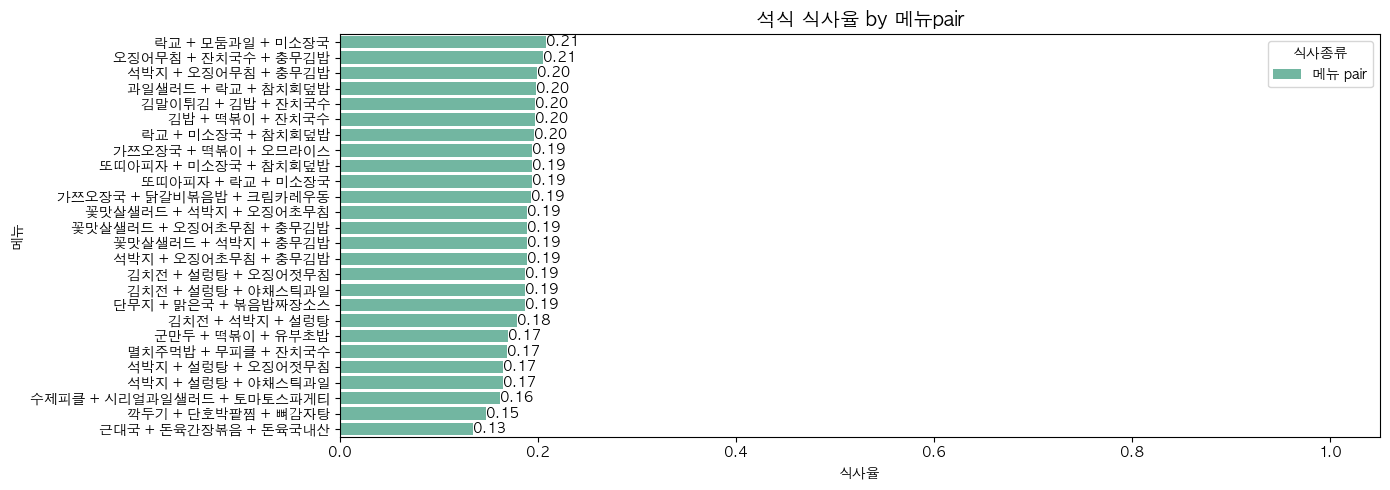

In [72]:
# 예시 DataFrame, 실제로는 이미 DataFrame이 있다고 가정
# df = pd.read_csv(...) 또는 df = your_dataframe
# 문자열로 되어있는 리스트를 진짜 리스트로 변환
#menu_lists = df['중식_메뉴리스트'].apply(ast.literal_eval)

# 조합 추출 및 정렬
pair_counts = Counter()

for menu_list in df['석식_메뉴리스트']:
    removed = ['김치국내산', '쌀국내산', '배추고추가루국내산', '쌀밥잡곡밥', '쌀현미흑미국내산', '쇠고기호주산', '쌀밥흑미밥찰현미밥', '포기김치']
    for i in removed:
        if i in menu_list:
            menu_list.remove(i)
    # 2개씩 조합 생성
    pairs = combinations(menu_list, 3)
    # 정렬해서 중복 제거 효과 (예: ('김치', '밥') == ('밥', '김치'))
    sorted_pairs = [tuple(sorted(pair)) for pair in pairs]
    pair_counts.update(sorted_pairs)

# 3번 이상 등장한 조합 필터링
frequent_pairs = {pair: count for pair, count in pair_counts.items() if count >= 3}

print(frequent_pairs)

# 4. 메뉴별 식사율 수집
pair_ratios = defaultdict(list)

for _, row in df.iterrows():
    for pair in frequent_pairs:
        if pair[0] in row['석식메뉴'] and pair[1] in row['석식메뉴']:
            pair_ratios[pair].append(row["석식_식사율"])

# 5. 평균 식사율 계산 (5회 이상 등장한 메뉴만)
pair_avg = {m: sum(v)/len(v) for m, v in pair_ratios.items()}

print(pair_avg)


# 6. 상위 10개씩 추출
pairs = sorted(pair_avg.items(), key=lambda x: x[1], reverse=True)

# 7. 시각화용 데이터 프레임 구성
plot_df_pair = pd.DataFrame(pairs, columns=["메뉴 pair", "식사율"])
plot_df_d = pd.DataFrame(dinner, columns=["메뉴", "식사율"])
plot_df_pair["식사종류"] = ["메뉴 pair"] * len(pairs)
plot_df_d["식사종류"] = ["석식"] * len(dinner)
# 튜플 → 문자열로 변환 (seaborn barplot을 위해)
plot_df_pair["메뉴 pair"] = plot_df_pair["메뉴 pair"].apply(lambda x: " + ".join(x))


# 8. 시각화
plt.figure(figsize=(14, 5))
ax = sns.barplot(data=plot_df_pair, x="식사율", y="메뉴 pair", hue="식사종류", dodge=True, palette="Set2")

# Bar에 식사율 표시
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', fontsize=10)

plt.title("석식 식사율 by 메뉴pair", fontsize=14)
plt.xlabel("식사율")
plt.ylabel("메뉴")
plt.xlim(0, 1.05)
plt.legend(title="식사종류")
plt.tight_layout()
plt.show()